In [2]:
#importing Liabraries

import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split

In [3]:
#reading the data

train = pd.read_csv('counterfeit_train.csv')
test = pd.read_csv('counterfeit_test.csv')

In [3]:
test.tail()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
1700,KXW10,NaN,Area027,1983,136.5704,Hreplacements,mild,0.050505,CityLimits,Tier 3,Medium
1701,CKE54,21.30,Area035,2002,57.0744,Antibiotics,critical,0.041118,DownTown,Tier 2,Small
1702,HAY13,20.40,Area017,2005,182.7422,Antiseptics,mild,0.191273,DownTown,Tier 2,Unknown
1703,ZEE32,20.00,Area018,2007,266.9672,Hreplacements,mild,0.013000,Industrial,Tier 3,Medium
1704,NDL93,8.08,Area045,2000,238.7694,Antibiotics,critical,0.098982,DownTown,Tier 2,Unknown


In [4]:
train.isnull().sum()

Medicine_ID               0
Counterfeit_Weight     1166
DistArea_ID               0
Active_Since              0
Medicine_MRP              0
Medicine_Type             0
SidEffect_Level           0
Availability_rating       0
Area_Type                 0
Area_City_Type            0
Area_dist_level           0
Counterfeit_Sales         0
dtype: int64

In [5]:
test.isnull().sum()

Medicine_ID              0
Counterfeit_Weight     297
DistArea_ID              0
Active_Since             0
Medicine_MRP             0
Medicine_Type            0
SidEffect_Level          0
Availability_rating      0
Area_Type                0
Area_City_Type           0
Area_dist_level          0
dtype: int64

In [6]:
train.shape

(6818, 12)

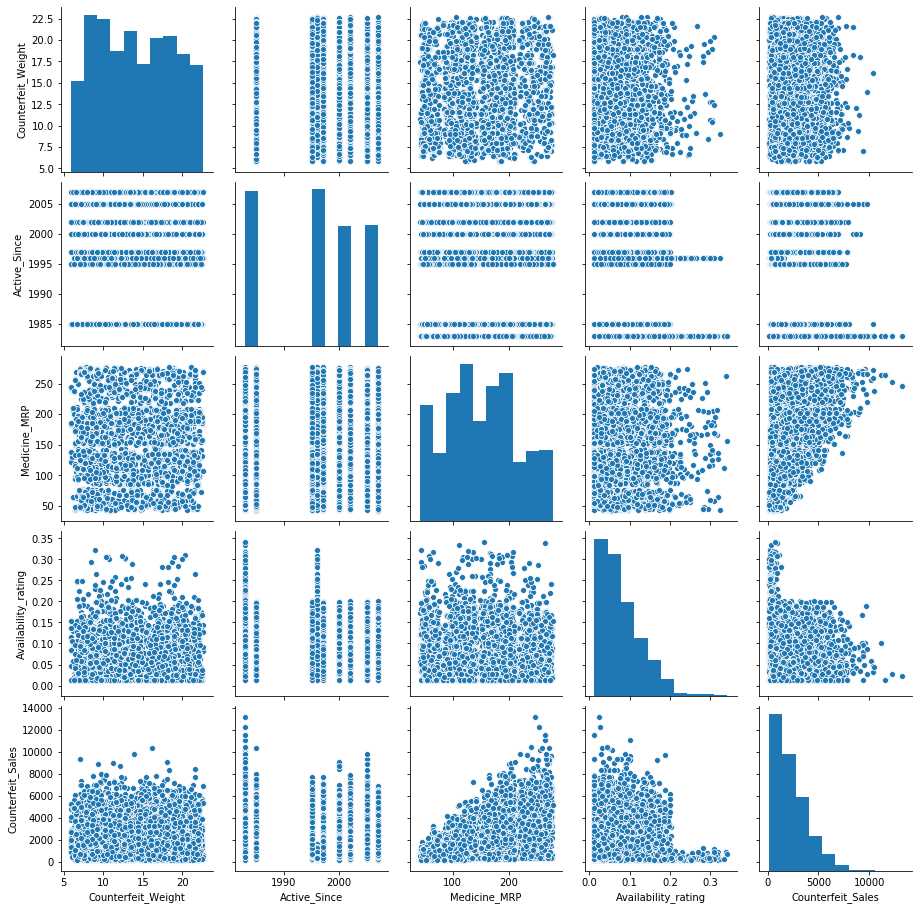

In [7]:
sb.pairplot(train)

In [8]:
 for col in ['Counterfeit_Weight']:
    train.drop(col, axis=1, inplace=True)
    test.drop(col, axis=1, inplace=True)

In [9]:
#checkingg unique values in each column
print(train.nunique())
print('-----------------------------------')
print(test.nunique())

Medicine_ID            1557
DistArea_ID              10
Active_Since              9
Medicine_MRP           5097
Medicine_Type            16
SidEffect_Level           2
Availability_rating    6317
Area_Type                 4
Area_City_Type            3
Area_dist_level           4
Counterfeit_Sales      3142
dtype: int64
-----------------------------------
Medicine_ID            1049
DistArea_ID              10
Active_Since              9
Medicine_MRP           1580
Medicine_Type            16
SidEffect_Level           2
Availability_rating    1588
Area_Type                 4
Area_City_Type            3
Area_dist_level           4
dtype: int64


In [14]:
train.Counterfeit_Sales

AttributeError: 'Series' object has no attribute 'sort'

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Medicine_ID          1705 non-null   object 
 1   DistArea_ID          1705 non-null   object 
 2   Active_Since         1705 non-null   int64  
 3   Medicine_MRP         1705 non-null   float64
 4   Medicine_Type        1705 non-null   object 
 5   SidEffect_Level      1705 non-null   object 
 6   Availability_rating  1705 non-null   float64
 7   Area_Type            1705 non-null   object 
 8   Area_City_Type       1705 non-null   object 
 9   Area_dist_level      1705 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 133.3+ KB


In [11]:
#creating Dummies-

for col in ['Medicine_Type','SidEffect_Level','Area_Type','Area_City_Type','Area_dist_level',"DistArea_ID"]:  
    temp=pd.get_dummies(train[col],prefix=col,drop_first=True)
    train=pd.concat([temp,train],1)
    train.drop([col],1,inplace=True)
       
    temp=pd.get_dummies(test[col],prefix=col,drop_first=True)
    test=pd.concat([temp,test],1)
    test.drop([col],1,inplace=True)

In [12]:
#Active since till today
train['Years'] = 2023-train['Active_Since']
test['Years'] = 2023-test['Active_Since']
train.drop('Active_Since',axis=1,inplace=True)
test.drop('Active_Since',axis=1,inplace=True)

In [13]:
train.head()

,DistArea_ID_Area013,DistArea_ID_Area017,DistArea_ID_Area018,DistArea_ID_Area019,DistArea_ID_Area027,DistArea_ID_Area035,DistArea_ID_Area045,DistArea_ID_Area046,DistArea_ID_Area049,Area_dist_level_Medium,...,Medicine_Type_MuscleRelaxants,Medicine_Type_OralContraceptives,Medicine_Type_Statins,Medicine_Type_Stimulants,Medicine_Type_Tranquilizers,Medicine_ID,Medicine_MRP,Availability_rating,Counterfeit_Sales,Years
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,RRA15,160.2366,0.070422,1775.5026,28
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,YVV26,110.4384,0.013000,3069.1520,40
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,LJC15,259.4092,0.060783,2603.0920,28
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,GWC40,99.9830,0.065555,1101.7130,28
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,QMN13,56.4402,0.248859,158.9402,40


In [14]:
test.shape

(1705, 37)

In [15]:
# Dependent variables and independent variables
x = train.drop(['Counterfeit_Sales','Medicine_ID'],axis=1)
y = train['Counterfeit_Sales']
y.shape, x.shape

((6818,), (6818, 36))

In [16]:
# splitting data into train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.05,random_state=1)

In [17]:
#model building- 1.Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [53]:
from sklearn.model_selection import GridSearchCV
parameter = { 'fit_intercept':['True','False'],'n_jobs':[-1]}
lm_regressor = GridSearchCV(lm,param_grid=parameter,cv=5)

# from sklearn.model_selection import RandomizedSearchCV
param_distributions = dict(penalty=['l2', 'l1'])
lm_reg = RandomizedSearchCV(lm,param_distributions, n_iter=[10,20], cv=5, n_jobs=-1)

In [54]:
lm_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': ['True', 'False'], 'n_jobs': [-1]})

In [56]:
print(lm_regressor.best_params_, lm_regressor.best_score_)

{'fit_intercept': 'True', 'n_jobs': -1} 0.560342053780602


In [57]:
y_pred = lm_regressor.predict(x_test)

In [58]:
y_test.head()

313     3053.1728
6723    1038.4620
4494    5828.2272
5421    1455.2528
2754     388.6412
Name: Counterfeit_Sales, dtype: float64

In [59]:
from sklearn.metrics import mean_absolute_error

In [60]:
MAE = mean_absolute_error(y_test,y_pred)

In [61]:
score = 1-(MAE/1660)

In [62]:
score

0.5512453111690003

In [27]:
test=test.drop('Medicine_ID',axis=1)

In [63]:
# now we need to predict on actual test data
pred=lm_regressor.predict(test)

In [64]:
pd.DataFrame(list(zip(list(pred))),columns=['Counterfeit_Sales']).to_csv('Public_safety_lm.csv')

In [33]:
#model no-2 Random Forest
from sklearn.ensemble import RandomForestRegressor
clf =RandomForestRegressor()

In [36]:
from sklearn.model_selection import GridSearchCV
parameter = {'n_estimators':[100],'criterion':['squared_error'], 'max_depth':[3,5,7,10], 'min_samples_split':[2,4,6], 'min_samples_leaf':[5,10]}
clf_regressor = GridSearchCV(clf,param_grid=parameter,cv=5)

In [37]:
clf_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100]})

In [40]:
clf_regressor.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 6,
 'n_estimators': 100}

In [41]:
clf_regressor.best_score_

0.5968862246603838

In [44]:
clf_pred = clf_regressor.predict(x_test)

In [45]:
MAE = mean_absolute_error(y_test,clf_pred)

In [46]:
score = 1-(MAE/1660)
score

0.5895289422023361

In [48]:
# now we need to predict on actual test data
clf_test_pred=lm.predict(test)

In [49]:
pd.DataFrame(list(zip(list(clf_test_pred))),columns=['Counterfeit_Sales']).to_csv('Public_safety_rf.csv')

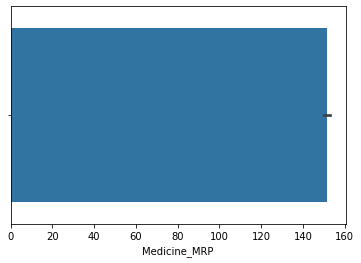

In [4]:
sb.barplot(train.Medicine_MRP)

In [5]:
train.describe()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
count,5652.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,14.115057,1995.836316,151.401518,0.079174,2280.583480
std,4.649668,8.368979,62.203961,0.051481,1693.354404
min,5.855000,1983.000000,41.790000,0.013000,146.290000
25%,9.995000,1985.000000,104.509400,0.040058,933.265600
50%,13.800000,1997.000000,153.195700,0.066955,1902.670400
75%,18.050000,2002.000000,196.148350,0.107697,3207.638400
max,22.650000,2007.000000,277.188400,0.341391,13199.964800


C:\Users\Vikram Patil\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\Vikram Patil\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\Vikram Patil\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\Vikram Patil\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x21eb002e7c8>,
 'caps': [<matplotlib.lines.Line2D at 0x21eb006ae08>,
 'boxes': [<matplotlib.lines.Line2D at 0x21eb006a348>],
 'medians': [<matplotlib.lines.Line2D at 0x21eb0070ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x21eb0074a88>],
 'means': []}

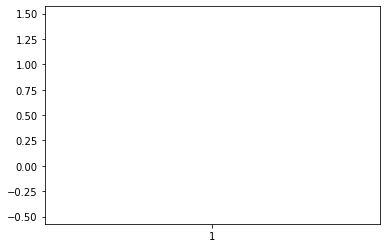

In [22]:
import matplotlib.pyplot as plt
plt.boxplot(train['Counterfeit_Weight'])